In [114]:
pip install scikit-learn

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.2/9.2 MB 4.5 MB/s eta 0:00:03
     - -------------------------------------- 0.3/9.2 MB 4.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.2 MB 4.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.2 MB 4.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/9.2 MB 2.8 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/9.2 MB 2.9 MB/s eta 0:00:03
     ---- ----------------------------------- 1.0/9.2 MB 3.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.2 MB 3.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.4/9.2 MB 3.3 MB/s eta 0:00:03
     ------ --------------------------------- 1.6/9.2 MB 3.4 MB/s eta 0:00:03
     ------- -------------------------------- 1.8/9.2 MB 3.5 MB/s eta 0:00:03
     -------- ------------------------------- 1.9/9.2 MB 3.5 MB/s eta 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import matplotlib.axes as axe
import matplotlib.ticker as tkr
import matplotlib.widgets as wdg
import statistics as stat
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit as cf
from sklearn.metrics import r2_score

df = pd.read_csv(r'C:\Users\chisi\Downloads\PhenoCam Stuff\TimeSeriesProvisionalData\arbutuslake_DB_1000_provisional_data\provisional_data\data_record_3\arbutuslake_DB_1000_roistats.csv')


In [28]:
df2.count() - 184

gcc    1707
dtype: int64

([<matplotlib.axis.XTick at 0x1baecfee0b0>,
 [Text(1, 0, 'Jan'),
  Text(32, 0, 'Feb'),
  Text(60, 0, 'Mar'),
  Text(91, 0, 'Apr'),
  Text(121, 0, 'May'),
  Text(152, 0, 'June'),
  Text(182, 0, 'July'),
  Text(213, 0, 'Aug'),
  Text(244, 0, 'Sep'),
  Text(274, 0, 'Oct'),
  Text(305, 0, 'Nov'),
  Text(335, 0, 'Dec')])

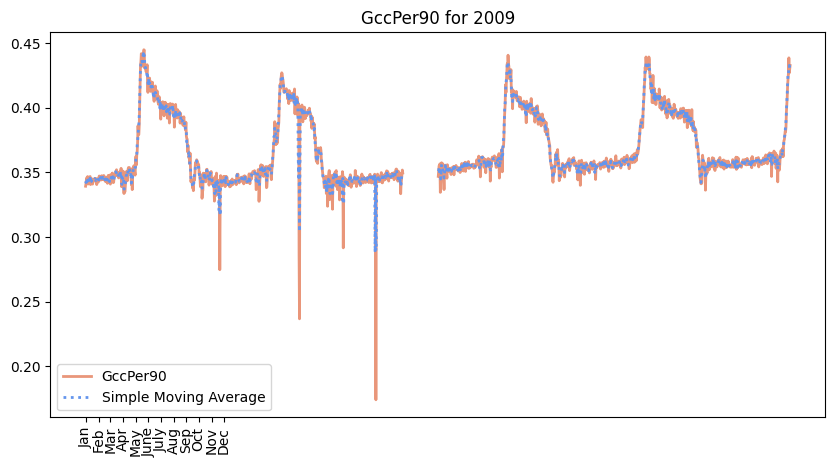

In [4]:
df2 = df.groupby('date')['gcc'].quantile(0.90)
df2 = pd.DataFrame(df2)

gcc90 = {"Date" : [],
         "GccPer90" : []}

gccSMA = {"Date" : [],
          "GccPer90" : []}

for x in range(184, 184+1707):
    gcc90["Date"].append(df2.index[x])
    gcc90["GccPer90"].append(df2["gcc"].iloc[x])
    
    GccSMA = (df2['gcc'].iloc[x+2] + (df2['gcc'].iloc[x]) + (df2['gcc'].iloc[x-1])) / 3
    gccSMA['GccPer90'].append(GccSMA)
    gccSMA['Date'].append(df2.index[x])   
    
gcc90 = pd.DataFrame(gcc90)
#gcc90.plot()

gccSMA = pd.DataFrame(gccSMA)


plt.figure(figsize=(10,5), dpi=100)

gcc90['GccPer90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)
gccSMA['GccPer90'].plot(label='Simple Moving Average' , color='cornflowerblue',linewidth=2 , linestyle=':', animated=True)

plt.title('GccPer90 for 2009')

plt.legend()
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
           labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                   'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [ ]:
diff = {"Date" : [],
        "Diff" : []}
for x in range(364):
    yes = gccSMA['GccPer90'].iloc[x+1]
    #sir = gccSMA['GccPer90'].iloc[x]
    pal = gccSMA['GccPer90'].iloc[x-1]
    pardner = yes - pal
    
    diff['Date'].append(gcc90['Date'].iloc[x])
    diff['Diff'].append(pardner)
    
diff = pd.DataFrame(diff)

diffSMA = {"Date" : [],
           "Rate of Change" : []}
for x in range(363):
    sma = (diff['Diff'].iloc[x+1] + diff['Diff'].iloc[x] + diff['Diff'].iloc[x-1])
    SMA = sma / 3
    diffSMA['Rate of Change'].append(SMA)
    diffSMA['Date'].append(diff['Date'].iloc[x])
diffSMA = pd.DataFrame(diffSMA)

In [ ]:
plt.figure(figsize=(16, 8), dpi=150)

diff['Diff'].plot(label='Diff' , color = "gray", kind='bar')
diffSMA['Rate of Change'].plot(label='DiffSMA', color = 'blue')

plt.title("Rate of Changes in Gcc for 2009")
plt.ylabel('Change in Gcc per Day')
plt.legend()
#plt.tick_params(axis='x' , which='major' , length=5 , pad=10, labelrotation=90, size=10)
plt.xticks(ticks=(1, 31, 59, 90, 114, 143, 171, 197, 226, 256, 286, 316),
           labels=(gcc90['Date'].iloc[1],
                  gcc90['Date'].iloc[31],
                  gcc90['Date'].iloc[59],
                  gcc90['Date'].iloc[90],
                  gcc90['Date'].iloc[114],
                  gcc90['Date'].iloc[143],
                  gcc90['Date'].iloc[171],
                  gcc90['Date'].iloc[197],
                  gcc90['Date'].iloc[226],
                  gcc90['Date'].iloc[256],
                  gcc90['Date'].iloc[286],
                  gcc90['Date'].iloc[316]) , 
            rotation='vertical')


,DOY,GccPer90
359,360,0.350430
360,361,0.352845
361,362,0.352235
362,363,0.352392
363,364,0.348135


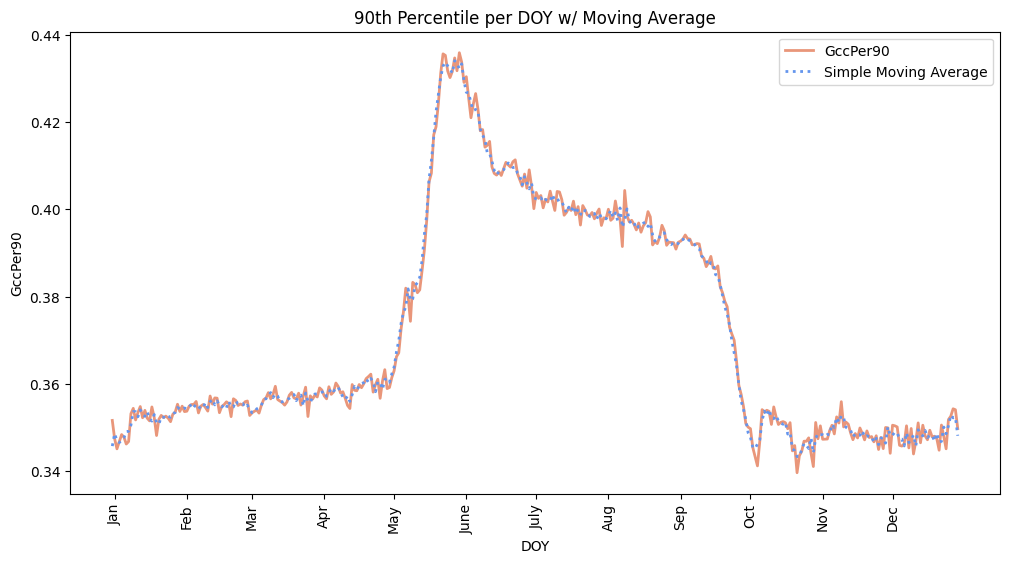

In [25]:
doy = df.groupby('doy')['gcc'].quantile(0.90)
doy = pd.DataFrame(doy)

DOYgcc90 = {"DOY" : [],
         "GccPer90" : []}

DOYgccSMA = {"DOY" : [],
          "GccPer90" : []}

for x in range(364):
    DOYgcc90["DOY"].append(doy.index[x])
    DOYgcc90["GccPer90"].append(doy["gcc"].iloc[x])
    
    GccSMA = (doy['gcc'].iloc[x+2] + (doy['gcc'].iloc[x]) + (doy['gcc'].iloc[x-1]))
    howdy = GccSMA /3
    DOYgccSMA['GccPer90'].append(howdy)
    DOYgccSMA['DOY'].append(doy.index[x])   
    
DOYgcc90 = pd.DataFrame(DOYgcc90)
#gcc90.plot()

DOYgccSMA = pd.DataFrame(DOYgccSMA)

plt.figure(figsize=(12,6), dpi=100)
DOYgcc90['GccPer90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)
DOYgccSMA['GccPer90'].plot(label='Simple Moving Average' , color='cornflowerblue',linewidth=2 , linestyle=':', animated=True)

plt.title('90th Percentile per DOY w/ Moving Average')
plt.xlabel('DOY')
plt.ylabel('GccPer90')
plt.legend()
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
               labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
DOYgccSMA.tail()

C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


([<matplotlib.axis.XTick at 0x1bafae8bcd0>,
 [Text(1, 0, 'Jan'),
  Text(32, 0, 'Feb'),
  Text(60, 0, 'Mar'),
  Text(91, 0, 'Apr'),
  Text(121, 0, 'May'),
  Text(152, 0, 'June'),
  Text(182, 0, 'July'),
  Text(213, 0, 'Aug'),
  Text(244, 0, 'Sep'),
  Text(274, 0, 'Oct'),
  Text(305, 0, 'Nov'),
  Text(335, 0, 'Dec')])

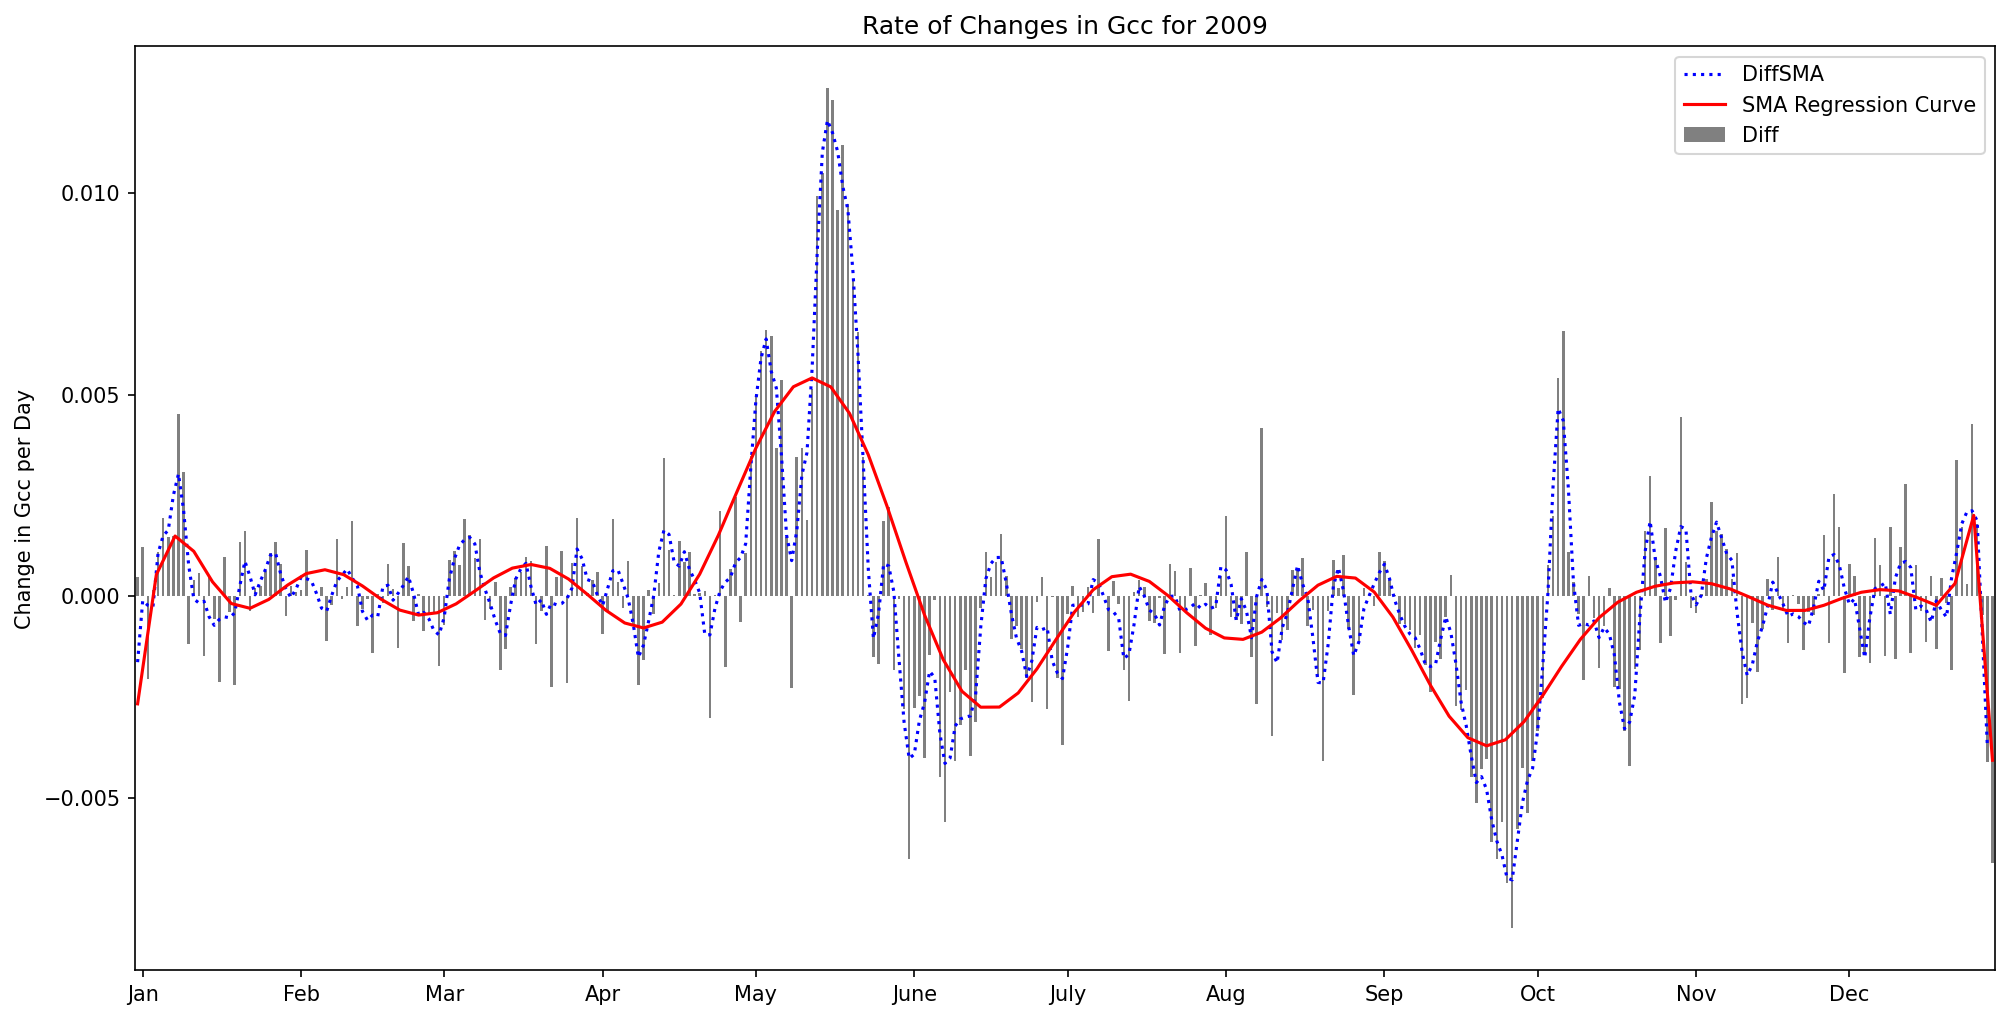

In [26]:
#--------------------------DOY Differential Calculations and DataFrame Construction Below ---------------------------------#

DOYdiff = {"Date" : [],
           "Diff" : []}
#gary =  DOYgccSMA['GccPer90'].iloc[2] - DOYgccSMA['GccPer90'].iloc[363]
#DOYdiff['Diff'].append[np.around(gary, 6)]
#DOYdiff['Date'].append[gcc90['Date'].iloc[1]]

for x in range(363):
    gary = DOYgccSMA['GccPer90'].iloc[x+1]
    the = DOYgccSMA['GccPer90'].iloc[x]
    snail = DOYgccSMA['GccPer90'].iloc[x-1]
    squilliams = gary - snail
    
    DOYdiff['Date'].append(DOYgcc90['DOY'].iloc[x])
    DOYdiff['Diff'].append(squilliams)

DOYdiff['Date'].append(DOYgccSMA['DOY'].iloc[363])
DOYdiff['Diff'].append(DOYgccSMA['GccPer90'].iloc[0]-DOYgccSMA['GccPer90'].iloc[362])
    
#snail = DOYgccSMA['GccPer90'].iloc[1]-DOYgccSMA['GccPer90'].iloc[362]
#DOYdiff['Diff'].append[snail]
#DOYdiff['Date'].append[gcc90['Date'].iloc[363]]
    
DOYdiff = pd.DataFrame(DOYdiff)

#--------------------------Simple Moving Average Calculations and DataFrame Construction Below-----------------------------#

DOYdiffSMA = {"Date" : [],
              "Rate of Change" : []}

for x in range(363):
    peter = (DOYdiff['Diff'].iloc[x+1] + DOYdiff['Diff'].iloc[x] + DOYdiff['Diff'].iloc[x-1])
    parker = peter / 3
    DOYdiffSMA['Rate of Change'].append(parker)
    DOYdiffSMA['Date'].append(DOYgccSMA['DOY'].iloc[x])
DOYdiffSMA = pd.DataFrame(DOYdiffSMA)

#-------------------------------------------Regression Curve Calculations--------------------------------------------------#

naye = np.poly1d(np.polyfit(DOYdiffSMA['Date'], DOYdiffSMA['Rate of Change'], 53))

#------------------------------------------------- Figure Code Below ------------------------------------------------------#
plt.figure(figsize=(16, 8), dpi=150)
DOYdiff['Diff'].plot(label='Diff' , color = "gray", kind='bar')
DOYdiffSMA['Rate of Change'].plot(label='DiffSMA', color = 'blue', linestyle=':')
tt = np.linspace(0, 363, 100)
plt.plot(tt, naye(tt), c = 'r', label='SMA Regression Curve', linestyle='-')

plt.title("Rate of Changes in Gcc for 2009")
plt.ylabel('Change in Gcc per Day')
plt.legend()
#plt.tick_params(axis='x' , which='major' , length=5 , pad=10, labelrotation=90, size=10)
#plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
               labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


([<matplotlib.axis.XTick at 0x2389ad09120>,
 [Text(1, 0, 'Jan'),
  Text(32, 0, 'Feb'),
  Text(60, 0, 'Mar'),
  Text(91, 0, 'Apr'),
  Text(121, 0, 'May'),
  Text(152, 0, 'June'),
  Text(182, 0, 'July'),
  Text(213, 0, 'Aug'),
  Text(244, 0, 'Sep'),
  Text(274, 0, 'Oct'),
  Text(305, 0, 'Nov'),
  Text(335, 0, 'Dec')])

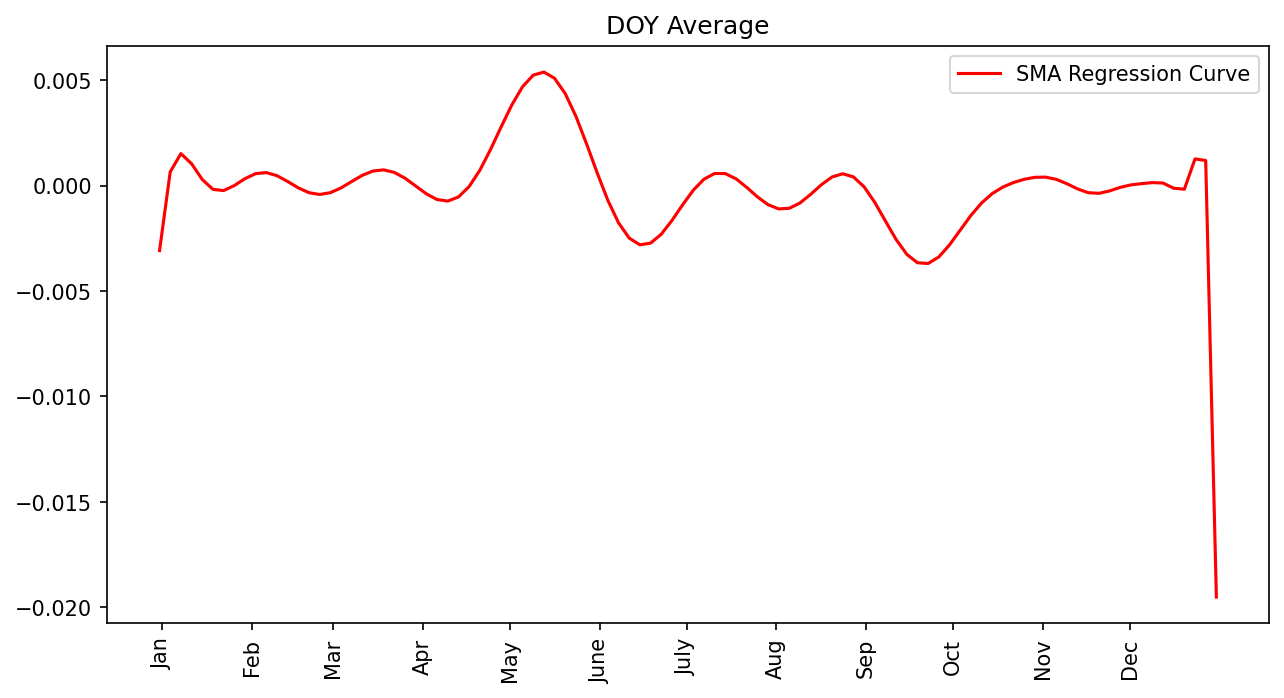

In [71]:
naye = np.poly1d(np.polyfit(DOYdiffSMA['Date'], DOYdiffSMA['Rate of Change'], 52))

plt.figure(figsize=(10,5),dpi=150)

tt = np.linspace(0, 365, 100)
plt.plot(tt, naye(tt), c = 'r', label='SMA Regression Curve', linestyle='-')

plt.title('DOY Average')

plt.legend()
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
           labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                   'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [83]:
for n in range (100):
    regress = np.poly1d(np.polyfit(DOYdiffSMA['Date'], DOYdiffSMA['Rate of Change'], n))
    getit = {'Regress' : []}
    for r in range(363):
        bruh = np.polyval(regress, r)
        getit['Regress'].append(bruh)
    R2 = r2_score(DOYdiffSMA['Rate of Change'], getit['Regress'])
    #if R2 > 0.9:
    print(n, "-----", R2)
        

0 ----- 0.0
1 ----- 0.0342179080458439
2 ----- 0.03471260530575637
3 ----- 0.10228176520717114
4 ----- 0.10650537863253584
5 ----- 0.15555361319954408
6 ----- 0.1555999182703064
7 ----- 0.1619021447943635
8 ----- 0.1747649416685051
9 ----- 0.17973764906894663
10 ----- 0.21559436785497976
11 ----- 0.2319715632091568
12 ----- 0.33296802950584536
13 ----- 0.344505852850589
14 ----- 0.3621675967543201
15 ----- 0.3708141732075504
16 ----- 0.3746668977861919
17 ----- 0.38799891192528047
18 ----- 0.381522844073099
19 ----- 0.4266302359196854
20 ----- 0.4367198552411632
21 ----- 0.439949339827572


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

22 ----- 0.43927150951790084
23 ----- 0.4436815112293081
24 ----- 0.48122841941246863
25 ----- 0.4723270565059018
26 ----- 0.4648107815766753
27 ----- 0.4604238698025508
28 ----- 0.5127573207448367
29 ----- 0.5103643461256131
30 ----- 0.5054548851479863
31 ----- 0.4990694837412929
32 ----- 0.49247399092002997


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

33 ----- 0.5199208551403536
34 ----- 0.5215516608743729
35 ----- 0.5219087881779713
36 ----- 0.5209056490370523
37 ----- 0.5186577107126698
38 ----- 0.5218853371560568
39 ----- 0.5221794201510496
40 ----- 0.5223395521061553
41 ----- 0.5221914003152797


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

42 ----- 0.5216195544368377
43 ----- 0.5205720162121805
44 ----- 0.5190762530631354
45 ----- 0.5213325284107841
46 ----- 0.5215913024628493
47 ----- 0.5218087803468601
48 ----- 0.5219485936845403
49 ----- 0.5220024986198346


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

50 ----- 0.5219636531827113
51 ----- 0.5218199765568086
52 ----- 0.521598992879263
53 ----- 0.5220417134017925
54 ----- 0.522012138977149
55 ----- 0.5219342675128225
56 ----- 0.5218032441480343


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy

57 ----- 0.5216201701161972
58 ----- 0.5213899834966171
59 ----- 0.5211190648196609
60 ----- 0.5208142565067353
61 ----- 0.5208137044984659
62 ----- 0.5208147673544423
63 ----- 0.5208142638169448


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

64 ----- 0.5208140668671284
65 ----- 0.520814562826315
66 ----- 0.520814999190514
67 ----- 0.5208138382836782
68 ----- 0.5208142642679202
69 ----- 0.5208144532045768
70 ----- 0.5208139811642898


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

71 ----- 0.5208145023576449
72 ----- 0.5208141128387795
73 ----- 0.5208146094632478
74 ----- 0.5208142984699673
75 ----- 0.5208146078753911
76 ----- 0.5208142184692053
77 ----- 0.5208143311861555


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

78 ----- 0.5208144237009398
79 ----- 0.5208141504625716
80 ----- 0.5208141623343965
81 ----- 0.5208146112437004
82 ----- 0.5208140325716194
83 ----- 0.5208141982976506
84 ----- 0.5208151127271201


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

85 ----- 0.5208148741069485
86 ----- 0.5208140956431033
87 ----- 0.5208141971984207
88 ----- 0.5208141257919927
89 ----- 0.5208140377114838
90 ----- 0.5208145596503502


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

91 ----- 0.5208147174633717
92 ----- 0.5208143864074775
93 ----- 0.5208145933527828
94 ----- 0.5208140251829962
95 ----- 0.5208148618075379
96 ----- 0.5208142439958874
97 ----- 0.5208137547239089
98 ----- 0.5208147579492259
99 ----- 0.5208145674224356


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


([<matplotlib.axis.XTick at 0x2a6b794c910>,
 [Text(1, 0, 'Jan'),
  Text(32, 0, 'Feb'),
  Text(60, 0, 'Mar'),
  Text(91, 0, 'Apr'),
  Text(121, 0, 'May'),
  Text(152, 0, 'June'),
  Text(182, 0, 'July'),
  Text(213, 0, 'Aug'),
  Text(244, 0, 'Sep'),
  Text(274, 0, 'Oct'),
  Text(305, 0, 'Nov'),
  Text(335, 0, 'Dec')])

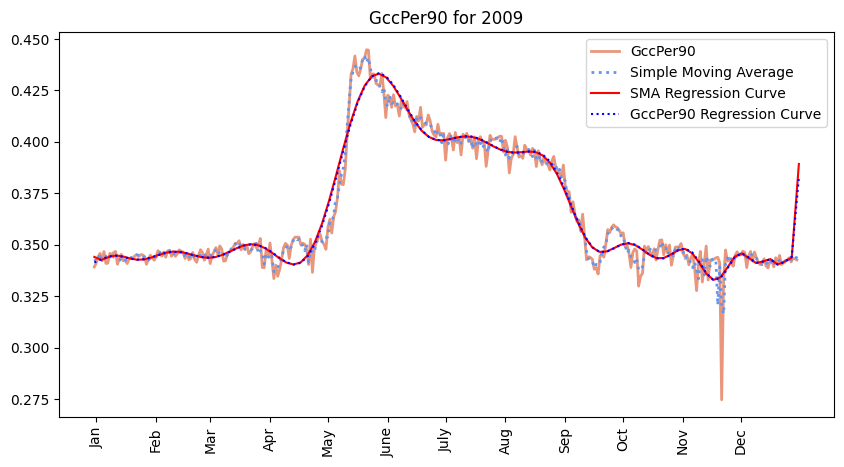

In [139]:
#----------------------------------gcc90 Data Calculations and DataFrame construction below----------------#

df2 = df.groupby('date')['gcc'].quantile(0.90)
df2 = pd.DataFrame(df2)

gcc90 = {"Date" : [],
         "GccPer90" : []}

gccSMA = {"Date" : [],
          "GccPer90" : []}

for x in range(184, 184+365):
    gcc90["Date"].append(df2.index[x])
    gcc90["GccPer90"].append(df2["gcc"].iloc[x])
    
    GccSMA = (df2['gcc'].iloc[x+2] + (df2['gcc'].iloc[x]) + (df2['gcc'].iloc[x-1])) / 3
    gccSMA['GccPer90'].append(GccSMA)
    gccSMA['Date'].append(df2.index[x])   
    
gcc90 = pd.DataFrame(gcc90)
#gcc90.plot()

gccSMA = pd.DataFrame(gccSMA)

#------------------------------------Regressional Line Calculations below----------------------------------#
#---------Polynomial Regression Here-----------#
regress = np.poly1d(np.polyfit(gcc90.index, gccSMA['GccPer90'], 52))
regress1= np.poly1d(np.polyfit(gcc90.index, gcc90['GccPer90'], 52))
#print(regress)

#print(regress1)

#---------Sinusoidal Regression Here-----------#

#def calc_sine(x,a,b,c,d):
 #   return a * np.sin(b* ( x + np.radians(c))) + d
#popt, pcov = cf(calc_sine, gccSMA.index, gccSMA['GccPer90'])

#---------------------------------------Figure Code Below--------------------------------------------------#

plt.figure(figsize=(10,5), dpi=100)

gcc90['GccPer90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)
gccSMA['GccPer90'].plot(label='Simple Moving Average' , color='cornflowerblue',linewidth=2 , linestyle=':', animated=True)

xx = np.linspace(0, 365, 100)
plt.plot(xx, regress(xx), c = 'r', label='SMA Regression Curve', linestyle='-')
plt.plot(xx, regress1(xx), c='b', label = 'GccPer90 Regression Curve', linestyle=':')

plt.title('GccPer90 for 2009')

plt.legend()
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
           labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                   'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [188]:
for n in range (1, 100):
    global regress
    regress = np.poly1d(np.polyfit(gcc90.index, gccSMA['GccPer90'], n))
    getit = {'Regress' : []}
    for r in range(365):
        bruh = np.polyval(regress, r)
        getit['Regress'].append(bruh)
    R2 = r2_score(gccSMA['GccPer90'], getit['Regress'])
    if R2 > 0.963:
        print(n, "-----", np.around(R2, 3))

C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

52 ----- 0.965
53 ----- 0.965
54 ----- 0.964
55 ----- 0.964
56 ----- 0.964
57 ----- 0.964
58 ----- 0.963
59 ----- 0.964
60 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPyth

61 ----- 0.964
62 ----- 0.964
63 ----- 0.964
64 ----- 0.964
65 ----- 0.964
66 ----- 0.964
67 ----- 0.964
68 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

69 ----- 0.964
70 ----- 0.964
71 ----- 0.964
72 ----- 0.964
73 ----- 0.964
74 ----- 0.964
75 ----- 0.964
76 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

77 ----- 0.964
78 ----- 0.964
79 ----- 0.964
80 ----- 0.964
81 ----- 0.964
82 ----- 0.964
83 ----- 0.964
84 ----- 0.964
85 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

86 ----- 0.964
87 ----- 0.964
88 ----- 0.964
89 ----- 0.964
90 ----- 0.964
91 ----- 0.964
92 ----- 0.964
93 ----- 0.964
94 ----- 0.964
95 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

96 ----- 0.964
97 ----- 0.964
98 ----- 0.964
99 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [200]:
for n in range (1, 100):
    regress = np.poly1d(np.polyfit(gcc90.index, gcc90['GccPer90'], n))
    getit = {'Regress' : []}
    for r in range(365):
        bruh = np.polyval(regress, r)
        getit['Regress'].append(bruh)
    R2 = r2_score(gccSMA['GccPer90'], getit['Regress'])
    if R2 > 0.963:
        print(n, "-----", np.around(R2, 3))
        

C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

52 ----- 0.965
53 ----- 0.964
54 ----- 0.964
55 ----- 0.964
56 ----- 0.963
57 ----- 0.963
58 ----- 0.963
59 ----- 0.963


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\

60 ----- 0.964
61 ----- 0.964
62 ----- 0.964
63 ----- 0.964
64 ----- 0.964
65 ----- 0.964
66 ----- 0.964
67 ----- 0.964
68 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:4

69 ----- 0.964
70 ----- 0.964
71 ----- 0.964
72 ----- 0.964
73 ----- 0.964
74 ----- 0.964
75 ----- 0.964
76 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

77 ----- 0.964
78 ----- 0.964
79 ----- 0.964
80 ----- 0.964
81 ----- 0.964
82 ----- 0.964
83 ----- 0.964
84 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

85 ----- 0.964
86 ----- 0.964
87 ----- 0.964
88 ----- 0.964
89 ----- 0.964
90 ----- 0.964
91 ----- 0.964
92 ----- 0.964
93 ----- 0.964
94 ----- 0.964
95 ----- 0.964
96 ----- 0.964
97 ----- 0.964
98 ----- 0.964
99 ----- 0.964


C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chisi\anaconda3\envs\ECOSs\lib\site-packages\IPython\core\interactive

5.722746400344581 ( 0.0012051011649710415 *sin( 24.489662411590373 * sin( -3.991200208880262 x + 0.9993181694618439 ) + -3.9132376453705517 )x^ 0.014875128073780684
0.0012051011649710415 24.489662411590373 -3.991200208880262 0.9993181694618439 -3.9132376453705517 0.05928092828406446 5.722746400344581 0.014875128073780684


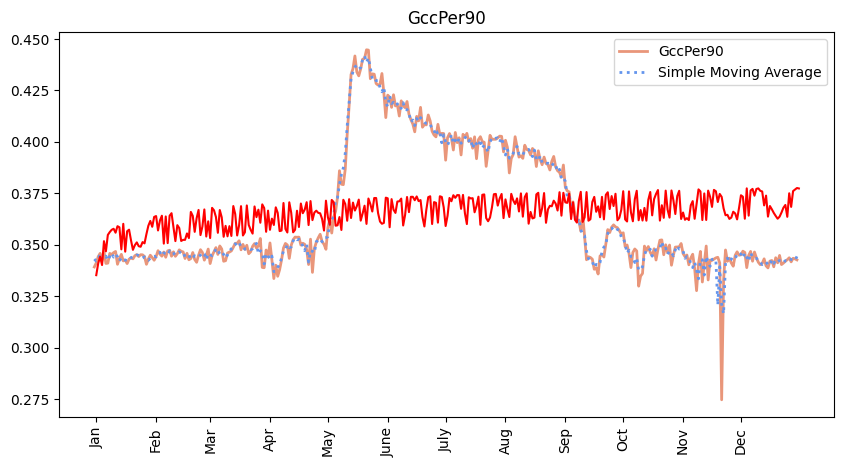

In [24]:
#----------------------------------gcc90 Data Calculations and DataFrame construction below----------------#

df2 = df.groupby('date')['gcc'].quantile(0.90)
df2 = pd.DataFrame(df2)

gcc90 = {"Date" : [],
         "GccPer90" : []}

gccSMA = {"Date" : [],
          "GccPer90" : []}

for x in range(184, 184+365): #For 2009 only, add 365 to 185 in the stop param, for all after 2009, add 1707 to 2009.
    gcc90["Date"].append(df2.index[x])
    gcc90["GccPer90"].append(df2["gcc"].iloc[x])
    
    GccSMA = (df2['gcc'].iloc[x+2] + (df2['gcc'].iloc[x]) + (df2['gcc'].iloc[x-1])) / 3
    gccSMA['GccPer90'].append(GccSMA)
    gccSMA['Date'].append(df2.index[x])   
    
gcc90 = pd.DataFrame(gcc90)
#gcc90.plot()

gccSMA = pd.DataFrame(gccSMA)

#------------------------------------Regressional Line Calculations below----------------------------------#
#---------Polynomial Regression Here-----------#
#regress = np.poly1d(np.polyfit(gcc90.index, gccSMA['GccPer90'], 100))
#regress1= np.poly1d(np.polyfit(gcc90.index, gcc90['GccPer90'],100))
#print(regress)

#print(regress1)

#---------Sinusoidal Regression Here-----------#
x, y = gccSMA.index, gccSMA['GccPer90']

def calc_sine(x,a,b,c,d,e,f, g, h):
    return g*(a * np.sin(b* ( c*np.sin(x +d)+e)) + f)*x**h
    #return a*np.sin(x)**2+b*np.sin(x)-c*np.cos(x)-d*np.cos(x)**2+e 
popt, pcov = cf(calc_sine, x, y)
a, b, c, d, e, f, g, h = popt

#---------------------------------------Figure Code Below--------------------------------------------------#

ax = plt.figure(figsize=(10,5), dpi=100)
ax.name = 'ax'

gcc90['GccPer90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)
gccSMA['GccPer90'].plot(label='Simple Moving Average' , color='cornflowerblue',linewidth=2 , linestyle=':', animated=True)

xx = np.linspace(1, 365, 365)
#plt.plot(xx, regress(xx), c = 'r', label='SMA Regression Curve', linestyle='-')
#plt.plot(xx, regress1(xx), c='b', label = 'GccPer90 Regression Curve', linestyle=':')
plt.plot(xx, calc_sine(xx, a, b ,c, d, e, f, g, h), c='r')

plt.title('GccPer90')

plt.legend()
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(ticks=(1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335),
           labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                   'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

print( g, '(', a, "*sin(", b, "* sin(", c, "x +", d, ") +", e, ')x^' , h)
print(a, b, c, d, e,f, g, h)

In [227]:
df2.count() - 184

gcc    1707
dtype: int64

<Axes: xlabel='Date', ylabel='GccPer90'>

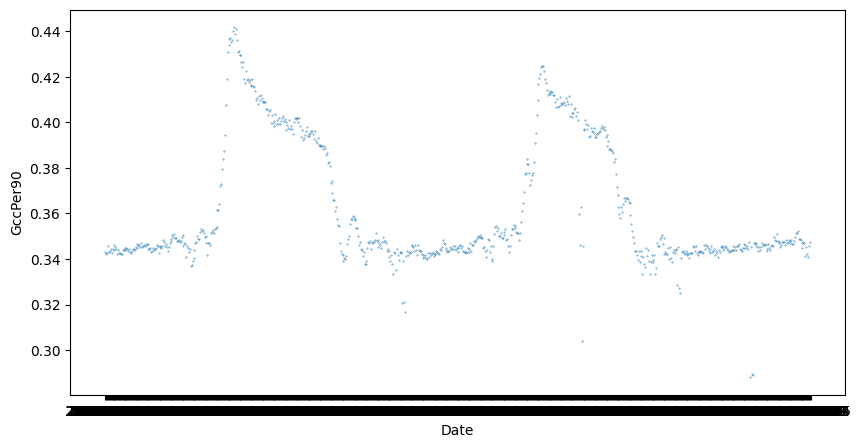

In [94]:
gccSMA.plot.scatter(x='Date',
                    y='GccPer90',
                    s=0.1,
                    figsize=(10,5))

In [102]:
for x in range(768):
    if gccSMA['GccPer90'].iloc[x] is not np.inf:
        print(x)
#There's a gap in dates from 2011-04-27 to some allotted time. Find out that gap and why it exists.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [99]:
gccSMA['GccPer90'].iloc[1].type()

AttributeError: 'numpy.float64' object has no attribute 'type'

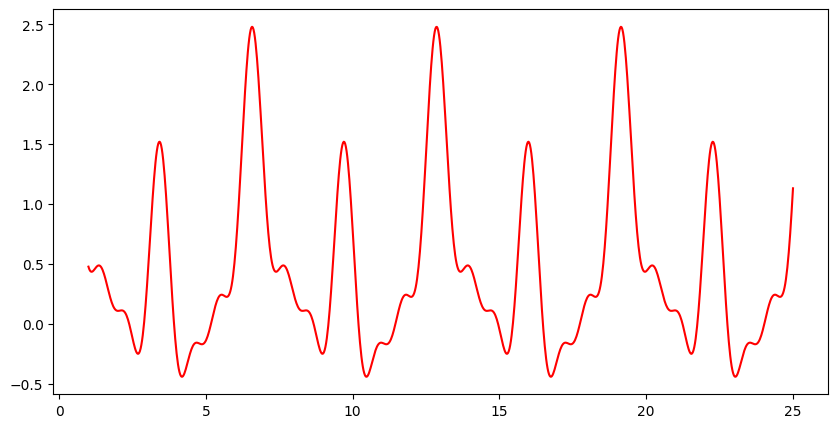

In [73]:
def calc_sine(x,a,b,c,d,e,f,g,h, i, j, k):
    #return (a* np.sin(b* ( c*np.sin(x +d)+e)) + f)
    #return a*np.sin(x)**2+b*np.sin(x)-c*np.cos(x)-d*np.cos(x)**2+e
    return a*np.sin(b*x+c)**2+d*np.sin(g*x+h)+i*np.sin(j*x+k)**3
    #return a*np.sin(b*x**2+c*x+x+d)+e

def sine_power(x, a, b, c, d):
    return x**(a*np.sin(b*x+c)+d)
plt.figure(figsize=(10,5), dpi=100)
line = np.linspace(1, 25, 1000)

#def calc_sine(x,a,b,c,d, e):
 #   return a * np.sin(b* ( b*np.sin(x +c)+d)) + e

plt.plot(line, calc_sine(line, 1, 2, 1, 0.5, 1, 1, 1, 1, 1, 2, 1), c='r')

<Axes: >

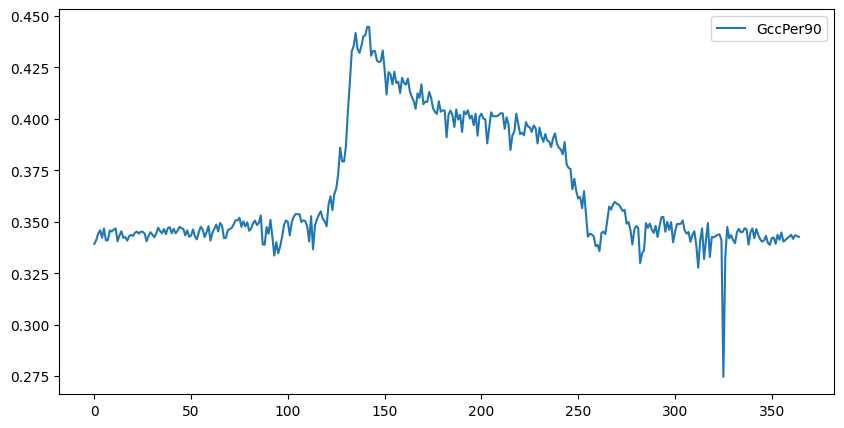

In [95]:
gcc90.plot(figsize=(10,5))

general formula used for regression: aSin[bSin( cSin(x)^d )+x]+e
second formula used for regression: aSin^2(fx)+bSin(gx)-ccos(hx)-dcos^2(x)+e

In [93]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) # df1, df2

['DOYdiff', 'DOYdiffSMA', 'DOYgcc90', 'DOYgccSMA', '_', '_12', '_26', '_27', '_30', '_31', '_32', '_33', '_36', '_38', '_40', '_42', '_47', '_49', '_52', '_53', '_54', '_56', '_58', '_59', '_60', '_62', '_91', 'df', 'df2', 'diff', 'diffSMA', 'doy', 'gcc90', 'gccSMA']


In [17]:
doy = 365

gccSMA['GccPer90'].count()

1619

In [27]:
x, y = DOYgccSMA.index, DOYgccSMA['GccPer90']

def fourier(x, ang1, ang2, ang3):
    return ang1 + ang2*np.sin(doy*x)+ang3*np.sin(doy*x)

popt, pcov = cf(fourier, x, y, maxfev = 25000, nan_policy='omit', absolute_sigma=True, method='lm')
ang1, ang2, ang3 = popt

plt.figure(figsize=(12,6), dpi=100)
gcc90['GccPer90'].plot(label='GccPer90', color = 'darksalmon', kind='line', linewidth=2, animated=True)

xx = np.linspace(1, 365, 10)
#plt.plot(xx, regress(xx), c = 'r', label='SMA Regression Curve', linestyle='-')
#plt.plot(xx, regress1(xx), c='b', label = 'GccPer90 Regression Curve', linestyle=':')
plt.plot(xx, fourier(x, ang1, ang2, ang3), c='r')

ValueError: Unable to coerce to Series, length must be 1: given 364